### Demo: Uncertainity in Classification (Logistic Regression vs. Bayes Classifier)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import multivariate_normal

In [2]:
def plot_decision_boundary(predict_fn, X, y, title, ax):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = predict_fn(grid).reshape(xx.shape)

    contour = ax.contourf(xx, yy, probs, vmin=0, vmax=1, levels=np.linspace(0, 1, 50), cmap="coolwarm", alpha=0.6)
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c="blue", label="Class 0")
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c="red", label="Class 1")
    ax.set_title(title)
    ax.legend()
    plt.colorbar(contour, ax=ax, label="P(class = 1)", boundaries=np.linspace(0, 1, 50))

**Case 1: Many Data Points**

In [3]:
np.random.seed(0)

X0 = np.random.randn(50, 2) + np.array([-3, 0])
X1 = np.random.randn(50, 2) + np.array([3, 0])

X = np.vstack([X0, X1])
y = np.array([0] * 50 + [1] * 50)


In [4]:
logreg = LogisticRegression(penalty=None)
logreg.fit(X, y)

def logreg_predict_proba(X):
    return logreg.predict_proba(X)[:, 1]

In [5]:
mu0, mu1 = X0.mean(axis=0), X1.mean(axis=0)
cov_prior = np.eye(2) * 5.0  # injecting a prior belief of high uncertainty

def bayes_predict_proba(X):
    p0 = multivariate_normal(mu0, cov_prior).pdf(X)
    p1 = multivariate_normal(mu1, cov_prior).pdf(X)
    return p1 / (p0 + p1)

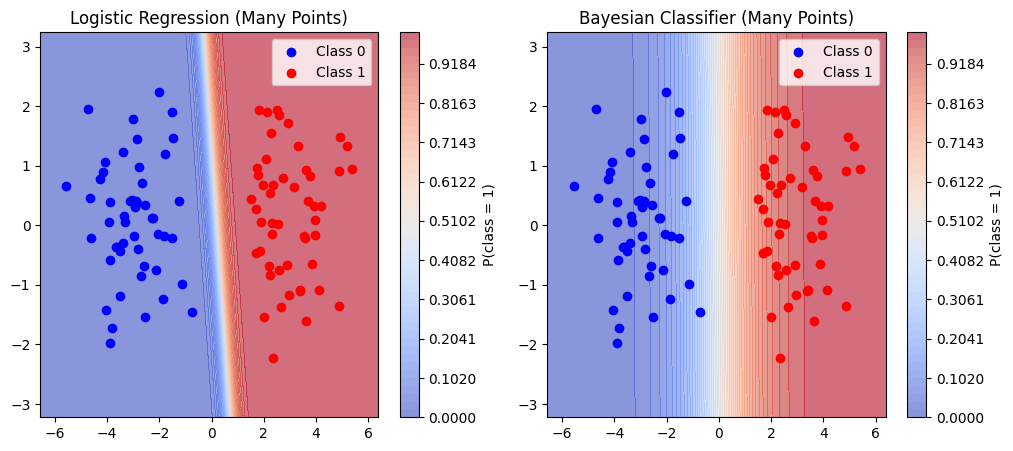

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_decision_boundary(logreg_predict_proba, X, y,
                       "Logistic Regression (Many Points)", axes[0])

plot_decision_boundary(bayes_predict_proba, X, y,
                       "Bayesian Classifier (Many Points)", axes[1])

plt.show()


**Case 2: Just one data point per class**

In [7]:
X = np.array([
    [-1.0, 0.0],  # class 0
    [ 1.0, 0.0],  # class 1
])
y = np.array([0, 1])


In [8]:
logreg = LogisticRegression(penalty=None)
logreg.fit(X, y)

def logreg_predict_proba(X):
    return logreg.predict_proba(X)[:, 1]

In [9]:
mu0, mu1 = X[y == 0][0], X[y == 1][0]
cov_prior = np.eye(2) * 5.0  # injecting a prior belief of high uncertainty

def bayes_predict_proba(X):
    p0 = multivariate_normal(mu0, cov_prior).pdf(X)
    p1 = multivariate_normal(mu1, cov_prior).pdf(X)
    return p1 / (p0 + p1)


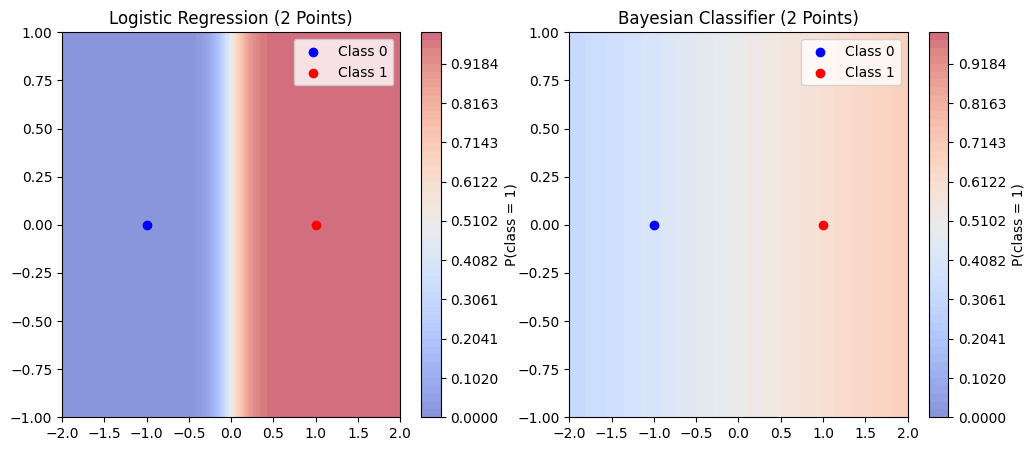

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_decision_boundary(logreg_predict_proba, X, y,
                       "Logistic Regression (2 Points)", axes[0])

plot_decision_boundary(bayes_predict_proba, X, y,
                       "Bayesian Classifier (2 Points)", axes[1])

plt.show()
